<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/Dusty-Stellar-Sources-Classification/blob/main/DSOC_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Mahdi-Abdollahii/Dusty-Stellar-Sources-Classification.git

Cloning into 'Dusty-Stellar-Sources-Classification'...
remote: Enumerating objects: 453, done.
remote: Counting objects: 100% (173/173), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 453 (delta 100), reused 85 (delta 49), pack-reused 280
Receiving objects: 100% (453/453), 65.41 MiB | 10.80 MiB/s, done.
Resolving deltas: 100% (238/238), done.


In [ ]:
!pip install pyunpack

In [ ]:
!pip install patool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 2.9 MB/s eta 0:00:00


# Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io, requests, zipfile
from zipfile import ZipFile
import seaborn as sns
from sklearn.metrics import confusion_matrix , accuracy_score , recall_score , precision_score , f1_score , classification_report
from pyunpack import Archive
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#https://blog.finxter.com/how-to-plot-sklearn-confusion-matrix-with-labels/
import numpy as np

def plot_confusion_matrix(cm,
                          target_names,
                          title = 'Confusion matrix',
                          cmap=None,
                          normalize=True,
                          size = [16,12],
                          file_name = False,
                          color_bar = True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    color_bar:    if Ture, plot the color bar on the right hand side
                  if false, Do not plot that

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    if cmap is None:
        cmap = plt.get_cmap('Greens')

    plt.figure(figsize=(size[0],size[1]))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.ylabel('Photometry label' , fontsize = 16 )
    plt.xlabel('Spectroscopy label', fontsize = 16 )

    if title is not None:
      plt.title(title ,fontsize = 16 )

    if color_bar == True :
      plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)




    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            #if cm[i,j]>= 0.01 : # if you want remove 0.1>
                plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                        horizontalalignment="center",
                        color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    if file_name != False :
        plt.savefig(file_name , dpi=300)
    plt.show()

# Data Preparing

In [ ]:
df = pd.read_csv("/content/Dusty-Stellar-Sources-Classification/Data/Preprocessed_Data.csv")

In [ ]:
df

,RAdeg,DEdeg,Umag,Bmag,Vmag,Imag,Jmag,Hmag,Ksmag,[3.6],[4.5],[5.8],[8.0],[24],SpClass,GeneralClass
0,69.338100,-70.579000,NaN,-0.485,-2.258,-4.690,-6.112,-7.032,-7.329,-7.6101,-7.7148,-7.8326,-8.0159,-8.8792,OAGB,DSS
1,71.613100,-68.796300,1.307,1.954,0.325,-2.250,-3.502,-5.238,-6.803,-8.6656,-9.3873,-9.8100,-10.2429,-11.1944,CAGB,DSS
2,71.827700,-69.705700,-1.052,-3.148,-5.010,-7.333,-8.420,-9.248,-9.515,-9.6540,-9.4759,-9.6545,-9.7627,-10.9685,RSG,DSS
3,72.157300,-69.393600,NaN,3.178,2.261,1.023,NaN,NaN,-5.600,-8.1534,-9.0379,-9.8431,-10.6543,-13.6554,YSO,DSS
4,72.393200,-69.097000,-5.412,-5.208,-5.460,-6.105,-6.339,-6.739,-7.281,-8.4329,-8.9152,-9.2952,-9.9431,-11.3106,OAGB,DSS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,14.527078,-72.068717,-0.619,-0.522,-1.027,-1.728,-2.806,-3.214,-3.766,-5.5270,-5.6600,-8.0320,-9.6220,-15.6450,YSO,DSS
614,14.488457,-72.654396,-1.593,-0.817,-1.266,-1.993,-3.270,-3.795,-4.912,-6.6860,-7.2730,-8.2610,-9.2260,-15.2890,YSO,DSS
615,14.027887,-72.789808,-1.605,-1.218,-1.578,-2.070,-2.708,-3.195,-3.745,-5.4810,-5.9750,-7.7430,-9.1680,-15.3400,YSO,DSS
616,16.039817,-72.837738,-2.357,-3.880,-5.665,NaN,-8.645,-9.325,-9.593,-9.6990,-9.7110,-9.9220,-10.0500,-10.8040,OAGB,DSS


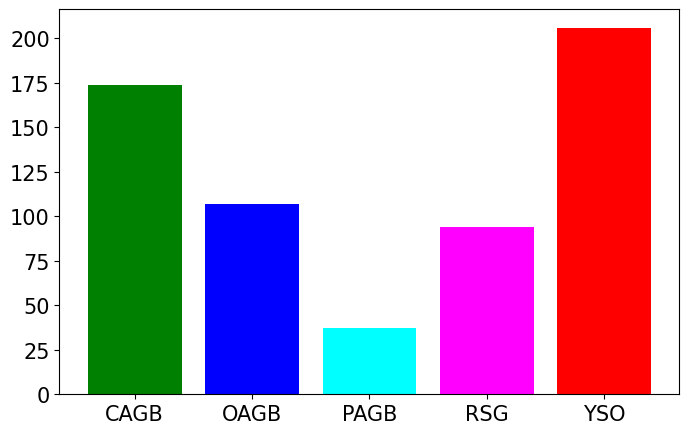

In [ ]:
n = df.pivot_table(index=['SpClass'], aggfunc='size').index
s = list(df.pivot_table(index=['SpClass'], aggfunc='size'))


colors = ['green','blue','cyan','magenta','red']

fig=plt.figure(figsize=(8,5))
line = plt.bar(n, s, log  = False, color = colors )

plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

plt.show()
fig.savefig('SPclass_hist_colors.pdf',dpi=400)

In following cell we set a number for each label to help us in evaluate our models.

In [ ]:
from sklearn import preprocessing

LE = preprocessing.LabelEncoder()
Y = LE.fit_transform(df['SpClass'])
Y = pd.DataFrame(Y)
Y.columns = ['EY']

print('Ordinal Encoding:')
LE.inverse_transform(np.arange(0,5))

Ordinal Encoding:


array(['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'], dtype=object)

In [ ]:
X = df[df.columns[2:-2]]
Y = Y['EY']

Here we use an algorithm named IterativeImputer to fill the blank (NaN) data points.

A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.

A more sophisticated approach is to use the IterativeImputer class, which models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.

For more information : https://scikit-learn.org/stable/modules/impute.html#iterative-imputer

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer( random_state= 0 )
X = imp.fit_transform(X)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
MMS.fit(X)
X = MMS.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X , Y , test_size= 0.10 , random_state = 1234 )
print('X_train : ' , X_train.shape)
print('X_test : ' , X_test.shape)
print('Y_train : ' , Y_train.shape)
print('Y_test : ' , Y_test.shape)

X_train :  (556, 12)
X_test :  (62, 12)
Y_train :  (556,)
Y_test :  (62,)


*   whitney ⇒  LMC
*   riebel  ⇒  LMC
*   Willis  ⇒ NGC 6334
*   Kamath ⇒ SMC
*   sirinvasan ⇒ LMC
*   Yang ⇒ LMC



In [ ]:
df_extinction = pd.read_csv('/content/Dusty-Stellar-Sources-Classification/Data/Extinction_DM.csv')
df_test = pd.read_csv("/content/Dusty-Stellar-Sources-Classification/Data/Final_Collected_Test_Data.csv",index_col='Unnamed: 0')
df_test.rename(columns={"Kmag":"Ksmag"},inplace=True)


df_Kamath2015 = df_test[df_test['Ref']=='Kamath2015']
df_Kamath2014 = df_test[df_test['Ref']=='Kamath2014']
df_Srinivasan2009 = df_test[df_test['Ref']=='Srinivasan2009']
df_Riebel2010 = df_test[df_test['Ref']=='Riebel2010']
df_Whitney2008 = df_test[df_test['Ref']=='Whitney2008']
df_Yang2011 = df_test[df_test['Ref']== 'Yang2011']
df_Yang2018 = df_test[df_test['Ref']== 'Yang2018']
df_Yang2021 = df_test[df_test['Ref']== 'Yang2021']
df_Yang2012 = df_test[df_test['Ref']== 'Yang2012']
df_Yang2019 = df_test[df_test['Ref']== 'Yang2019']
df_Yang2020 = df_test[df_test['Ref']== 'Yang2020']
df_Gruendl2009 = df_test[df_test['Ref']== 'Gruendl2009']
df_Boyer2011 = df_test[df_test['Ref']== 'Boyer2011']

In [ ]:
df_Boyer2011

,Jmag,Hmag,Ksmag,[3.6],[4.5],[5.8],[8.0],[24],RAJ2000,DEJ2000,Ref,Type,Umag,Bmag,Vmag,Imag
49065,12.63,11.97,11.91,11.85,11.85,11.69,11.74,NaN,3.014258,-73.063221,Boyer2011,RSG,NaN,NaN,NaN,NaN
49066,13.19,12.49,12.40,12.25,12.32,12.27,12.28,NaN,3.524737,-73.357496,Boyer2011,RSG,NaN,NaN,NaN,NaN
49067,11.39,10.75,10.59,10.51,NaN,10.50,NaN,NaN,3.635940,-72.855477,Boyer2011,RSG,NaN,NaN,NaN,NaN
49068,12.47,11.94,11.74,11.75,NaN,11.77,NaN,NaN,3.666873,-72.774153,Boyer2011,RSG,NaN,NaN,NaN,NaN
49069,11.60,11.04,10.77,10.51,NaN,10.43,NaN,NaN,3.693067,-72.688616,Boyer2011,RSG,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56551,13.89,12.87,12.14,11.49,11.26,11.01,10.75,NaN,28.138006,-74.251890,Boyer2011,CAGB,NaN,NaN,NaN,NaN
56552,13.02,11.87,11.21,10.69,10.75,10.58,10.21,NaN,28.849220,-74.896593,Boyer2011,CAGB,NaN,NaN,NaN,NaN
56553,13.22,12.21,11.62,10.98,11.09,10.90,10.49,NaN,29.054917,-73.477329,Boyer2011,CAGB,NaN,NaN,NaN,NaN
56554,12.65,11.71,11.22,10.71,10.86,10.71,10.37,NaN,32.181180,-75.020332,Boyer2011,CAGB,NaN,NaN,NaN,NaN


In [ ]:
df_test

,Jmag,Hmag,Ksmag,[3.6],[4.5],[5.8],[8.0],[24],RAJ2000,DEJ2000,Ref,Type,Umag,Bmag,Vmag,Imag
0,NaN,NaN,NaN,14.85,13.84,NaN,11.77,NaN,65.741080,-69.607390,Gruendl2009,YSO,NaN,NaN,NaN,NaN
1,16.19,15.56,14.62,13.31,12.77,11.99,10.08,NaN,65.809500,-69.503440,Gruendl2009,YSO,NaN,NaN,NaN,NaN
2,16.35,15.82,14.53,13.58,13.33,12.56,9.89,NaN,65.812960,-69.503920,Gruendl2009,YSO,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,14.30,13.84,13.17,11.45,8.71,66.041960,-69.219140,Gruendl2009,YSO,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,14.39,13.54,12.55,11.34,7.61,66.214500,-68.938080,Gruendl2009,YSO,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56551,13.89,12.87,12.14,11.49,11.26,11.01,10.75,NaN,28.138006,-74.251890,Boyer2011,CAGB,NaN,NaN,NaN,NaN
56552,13.02,11.87,11.21,10.69,10.75,10.58,10.21,NaN,28.849220,-74.896593,Boyer2011,CAGB,NaN,NaN,NaN,NaN
56553,13.22,12.21,11.62,10.98,11.09,10.90,10.49,NaN,29.054917,-73.477329,Boyer2011,CAGB,NaN,NaN,NaN,NaN
56554,12.65,11.71,11.22,10.71,10.86,10.71,10.37,NaN,32.181180,-75.020332,Boyer2011,CAGB,NaN,NaN,NaN,NaN


In [ ]:
#df_Kamath2014 = pd.concat([df_Kamath2014[ df_Kamath2014['Type'] == "PAGB" ],df_Kamath2014[ df_Kamath2014['Type'] == "YSO" ]])

In [ ]:
#df_Kamath2015 = pd.concat([df_Kamath2015[ df_Kamath2015['Type'] == "PAGB" ],df_Kamath2015[ df_Kamath2015['Type'] == "YSO" ]])

In [ ]:
df_list = [ df_Kamath2015, df_Kamath2014, df_Srinivasan2009, df_Riebel2010, df_Whitney2008,df_Yang2018,df_Yang2021,df_Yang2019,df_Yang2020,df_Gruendl2009,df_Boyer2011]
DM_list = [ 'LMC', 'SMC' , 'LMC', 'LMC', 'LMC','LMC','LMC','SMC','SMC','LMC','SMC']

In [ ]:
for k in range(len(df_list)):
  for i in df_list[k].columns:
    for j in range(len(df_extinction)):
      if i == df_extinction['BandPass'][j]:
        df_list[k][i]  = df_list[k][i] - df_extinction[DM_list[k]][j] - df_extinction[DM_list[k]][12]

In [ ]:
df_test = pd.concat(df_list)
df_test = df_test.reset_index(drop=True)

In [ ]:
df_test = df_test[list(df_test.columns[8:10])+list(df_test.columns[-4:])+list(df_test.columns[:8])+list(df_test.columns[10:12])]
df_test

,RAJ2000,DEJ2000,Umag,Bmag,Vmag,Imag,Jmag,Hmag,Ksmag,[3.6],[4.5],[5.8],[8.0],[24],Ref,Type
0,72.833083,-67.101333,0.640,-0.241,-1.658,-2.935,-3.942,-4.603,-4.777,-4.870,-4.784,-4.894,-4.916,-9.685,Kamath2015,PAGB
1,73.862417,-66.842222,-0.098,-1.695,-3.199,-4.599,-5.482,-6.304,-6.625,-7.617,-8.175,-8.751,-9.489,-11.147,Kamath2015,PAGB
2,74.230125,-68.459139,0.017,-1.429,-3.123,-4.648,-5.586,-6.367,-6.513,-6.912,-7.364,-8.010,-9.449,-12.092,Kamath2015,PAGB
3,75.588208,-69.221444,-2.600,-3.408,-4.380,-5.424,-5.565,-5.886,-5.936,-6.031,-6.097,-6.184,-6.079,-10.731,Kamath2015,PAGB
4,76.633750,-71.708278,-3.994,-4.025,-4.378,-4.803,-5.115,-5.250,-5.325,-5.481,-5.643,-7.029,-9.278,-13.352,Kamath2015,PAGB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56546,28.138006,-74.251890,NaN,NaN,NaN,NaN,-5.026,-6.037,-6.761,-7.400,-7.630,-7.880,-8.140,NaN,Boyer2011,CAGB
56547,28.849220,-74.896593,NaN,NaN,NaN,NaN,-5.896,-7.037,-7.691,-8.200,-8.140,-8.310,-8.680,NaN,Boyer2011,CAGB
56548,29.054917,-73.477329,NaN,NaN,NaN,NaN,-5.696,-6.697,-7.281,-7.910,-7.800,-7.990,-8.400,NaN,Boyer2011,CAGB
56549,32.181180,-75.020332,NaN,NaN,NaN,NaN,-6.266,-7.197,-7.681,-8.180,-8.030,-8.180,-8.520,NaN,Boyer2011,CAGB


(array([   45.,     0.,  8567.,     0.,     0.,  3345.,     0., 38066.,
            0.,  6528.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

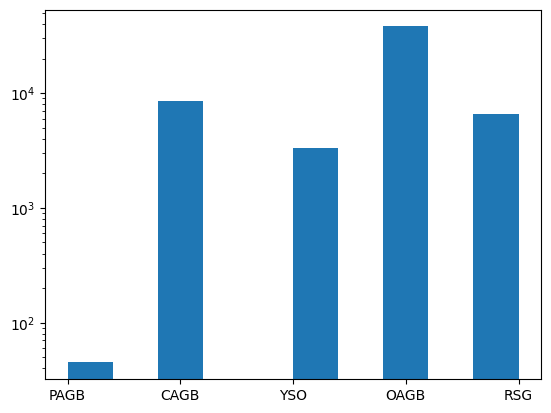

In [ ]:
plt.hist(df_test.Type,log=True)

In [ ]:
list_row_nan = []
list_Class = []
list_row_nan_6 = []
list_Class_6 = []
list_index_6 = []
for i in range(0,len(df_test)):
  count_nan = df_test.iloc[i].isnull().sum()
  list_row_nan.append(count_nan)
  if count_nan > 6 :
    list_row_nan_6.append(count_nan)
    list_Class_6.append(df_test.iloc[i][-1])
    list_index_6.append(i)

(array([1524.,    0.,  562.,    0.,  125.,    0.,   32.,    0.,    0.,
           2.]),
 array([ 7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. ]),
 <BarContainer object of 10 artists>)

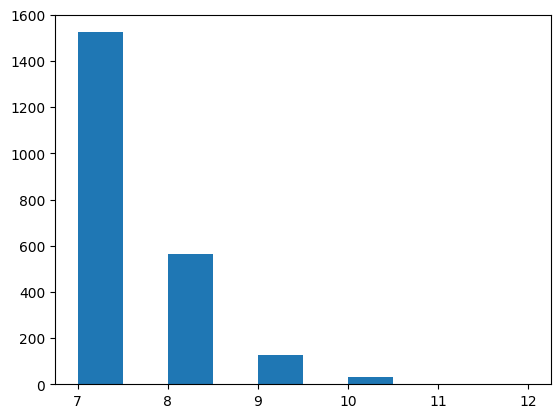

In [ ]:
plt.hist(list_row_nan_6)

(array([[1.1600e+02, 0.0000e+00, 3.0000e+01, 0.0000e+00, 0.0000e+00,
         1.7030e+03, 0.0000e+00, 3.9600e+02, 0.0000e+00, 0.0000e+00],
        [3.8066e+04, 0.0000e+00, 8.5670e+03, 0.0000e+00, 0.0000e+00,
         3.3450e+03, 0.0000e+00, 6.5280e+03, 0.0000e+00, 4.5000e+01]]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 2 BarContainer objects>)

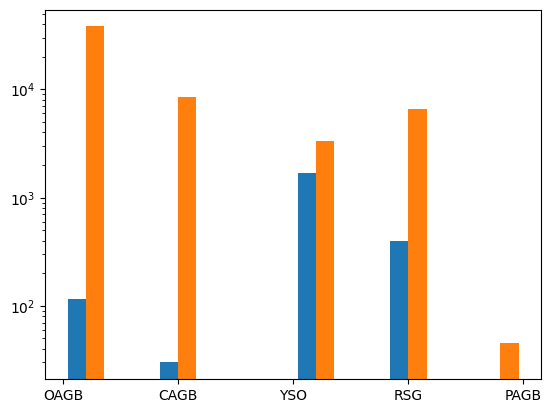

In [ ]:
plt.hist([list_Class_6,df_test['Type']],log=True)

In [ ]:
df_test.drop(list_index_6, axis=0, inplace=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
df_test

,RAJ2000,DEJ2000,Umag,Bmag,Vmag,Imag,Jmag,Hmag,Ksmag,[3.6],[4.5],[5.8],[8.0],[24],Ref,Type
0,72.833083,-67.101333,0.640,-0.241,-1.658,-2.935,-3.942,-4.603,-4.777,-4.870,-4.784,-4.894,-4.916,-9.685,Kamath2015,PAGB
1,73.862417,-66.842222,-0.098,-1.695,-3.199,-4.599,-5.482,-6.304,-6.625,-7.617,-8.175,-8.751,-9.489,-11.147,Kamath2015,PAGB
2,74.230125,-68.459139,0.017,-1.429,-3.123,-4.648,-5.586,-6.367,-6.513,-6.912,-7.364,-8.010,-9.449,-12.092,Kamath2015,PAGB
3,75.588208,-69.221444,-2.600,-3.408,-4.380,-5.424,-5.565,-5.886,-5.936,-6.031,-6.097,-6.184,-6.079,-10.731,Kamath2015,PAGB
4,76.633750,-71.708278,-3.994,-4.025,-4.378,-4.803,-5.115,-5.250,-5.325,-5.481,-5.643,-7.029,-9.278,-13.352,Kamath2015,PAGB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54301,28.138006,-74.251890,NaN,NaN,NaN,NaN,-5.026,-6.037,-6.761,-7.400,-7.630,-7.880,-8.140,NaN,Boyer2011,CAGB
54302,28.849220,-74.896593,NaN,NaN,NaN,NaN,-5.896,-7.037,-7.691,-8.200,-8.140,-8.310,-8.680,NaN,Boyer2011,CAGB
54303,29.054917,-73.477329,NaN,NaN,NaN,NaN,-5.696,-6.697,-7.281,-7.910,-7.800,-7.990,-8.400,NaN,Boyer2011,CAGB
54304,32.181180,-75.020332,NaN,NaN,NaN,NaN,-6.266,-7.197,-7.681,-8.180,-8.030,-8.180,-8.520,NaN,Boyer2011,CAGB


In [ ]:
Y_TEST = LE.transform(df_test['Type'])
Y_TEST = pd.DataFrame(Y_TEST)
Y_TEST.columns = ['EY']

print('Ordinal Encoding:')
LE.inverse_transform(np.arange(0,5))

Ordinal Encoding:


array(['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'], dtype=object)

In [ ]:
X_TEST = df_test[df_test.columns[2:-2]]
Y_TEST = Y_TEST['EY']

In [ ]:
X_TEST = imp.transform(X_TEST)

In [ ]:
X_TEST = MMS.transform(X_TEST)

(array([2.30000e+01, 2.38000e+02, 5.92000e+03, 1.89420e+05, 2.38723e+05,
        8.24550e+04, 6.45160e+04, 6.10220e+04, 9.31700e+03, 3.80000e+01]),
 array([-0.15990578,  0.00854643,  0.17699864,  0.34545086,  0.51390307,
         0.68235528,  0.85080749,  1.0192597 ,  1.18771191,  1.35616413,
         1.52461634]),
 <BarContainer object of 10 artists>)

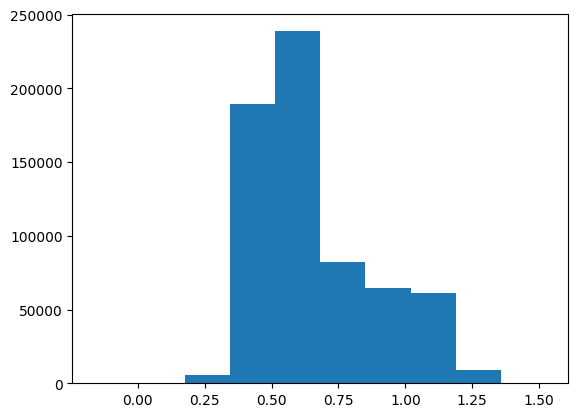

In [ ]:
plt.hist(X_TEST.reshape(-1))

(array([ 8537.,     0., 37950.,     0.,     0.,    45.,     0.,  6132.,
            0.,  1642.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

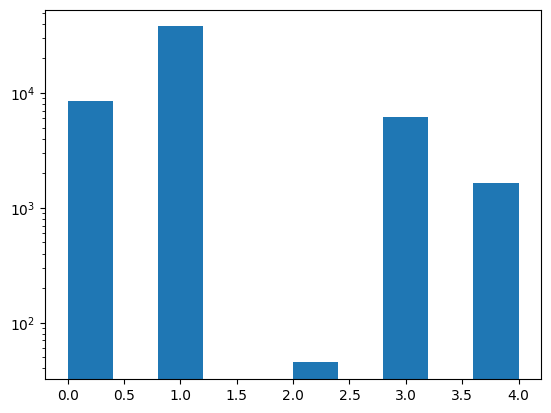

In [ ]:
plt.hist(Y_TEST,log=True)

(array([   45.,     0.,  8537.,     0.,     0.,  1642.,     0., 37950.,
            0.,  6132.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

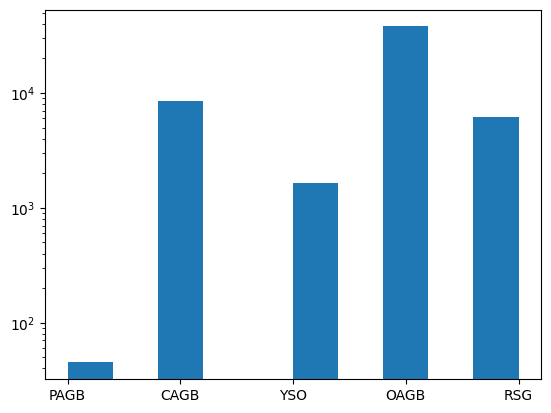

In [ ]:
plt.hist(df_test['Type'],log=True)

(array([  236.,    95., 41193.,  1025.,   360.,   126.,  2467.,    88.,
          180.,  8536.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

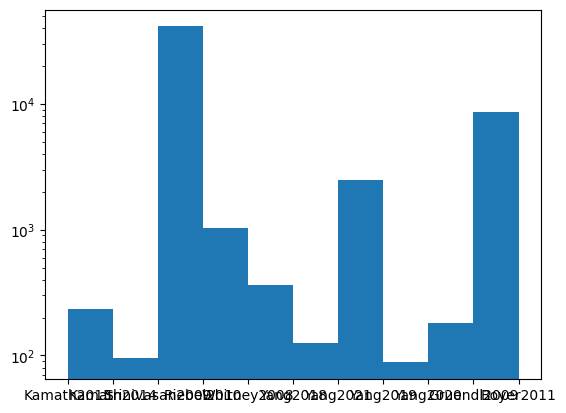

In [ ]:
plt.hist(df_test['Ref'],log=True)

In [ ]:
df_test

,RAJ2000,DEJ2000,Umag,Bmag,Vmag,Imag,Jmag,Hmag,Ksmag,[3.6],[4.5],[5.8],[8.0],[24],Ref,Type
0,72.833083,-67.101333,0.640,-0.241,-1.658,-2.935,-3.942,-4.603,-4.777,-4.870,-4.784,-4.894,-4.916,-9.685,Kamath2015,PAGB
1,73.862417,-66.842222,-0.098,-1.695,-3.199,-4.599,-5.482,-6.304,-6.625,-7.617,-8.175,-8.751,-9.489,-11.147,Kamath2015,PAGB
2,74.230125,-68.459139,0.017,-1.429,-3.123,-4.648,-5.586,-6.367,-6.513,-6.912,-7.364,-8.010,-9.449,-12.092,Kamath2015,PAGB
3,75.588208,-69.221444,-2.600,-3.408,-4.380,-5.424,-5.565,-5.886,-5.936,-6.031,-6.097,-6.184,-6.079,-10.731,Kamath2015,PAGB
4,76.633750,-71.708278,-3.994,-4.025,-4.378,-4.803,-5.115,-5.250,-5.325,-5.481,-5.643,-7.029,-9.278,-13.352,Kamath2015,PAGB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54301,28.138006,-74.251890,NaN,NaN,NaN,NaN,-5.026,-6.037,-6.761,-7.400,-7.630,-7.880,-8.140,NaN,Boyer2011,CAGB
54302,28.849220,-74.896593,NaN,NaN,NaN,NaN,-5.896,-7.037,-7.691,-8.200,-8.140,-8.310,-8.680,NaN,Boyer2011,CAGB
54303,29.054917,-73.477329,NaN,NaN,NaN,NaN,-5.696,-6.697,-7.281,-7.910,-7.800,-7.990,-8.400,NaN,Boyer2011,CAGB
54304,32.181180,-75.020332,NaN,NaN,NaN,NaN,-6.266,-7.197,-7.681,-8.180,-8.030,-8.180,-8.520,NaN,Boyer2011,CAGB


In [ ]:
df_Kamath2015 = df_test[df_test['Ref']=='Kamath2015']
df_Kamath2014 = df_test[df_test['Ref']=='Kamath2014']
df_Srinivasan2009 = df_test[df_test['Ref']=='Srinivasan2009']
df_Riebel2010 = df_test[df_test['Ref']=='Riebel2010']
df_Whitney2008 = df_test[df_test['Ref']=='Whitney2008']
df_Yang2011 = df_test[df_test['Ref']== 'Yang2011']
df_Yang2018 = df_test[df_test['Ref']== 'Yang2018']
df_Yang2021 = df_test[df_test['Ref']== 'Yang2021']
df_Yang2012 = df_test[df_test['Ref']== 'Yang2012']
df_Yang2019 = df_test[df_test['Ref']== 'Yang2019']
df_Yang2020 = df_test[df_test['Ref']== 'Yang2020']
df_Gruendl2009 = df_test[df_test['Ref']== 'Gruendl2009']
df_Boyer2011 = df_test[df_test['Ref']== 'Boyer2011']

In [ ]:
label_counts  = df_test.groupby('Ref')['Type'].count()
label_counts

Ref
Boyer2011          7446
Gruendl2009        1090
Kamath2014           95
Kamath2015          236
Riebel2010         1025
Srinivasan2009    41193
Whitney2008         360
Yang2018            126
Yang2019             88
Yang2020            180
Yang2021           2467
Name: Type, dtype: int64

In [ ]:
df_list = [ df_Kamath2015, df_Kamath2014, df_Srinivasan2009, df_Riebel2010, df_Whitney2008,df_Yang2018,df_Yang2021,df_Yang2019,df_Yang2020,df_Gruendl2009,df_Boyer2011]
for i in df_list:
  df_prime = i
  label_counts  = df_prime.groupby('Type')['Type'].count()
  print(df_prime.loc[list(df_prime.index)[0],"Ref"])
  print(label_counts)
  print(len(df_prime))
  print("++++++++++++++++")

Kamath2015
Type
CAGB     51
PAGB     31
YSO     154
Name: Type, dtype: int64
236
++++++++++++++++
Kamath2014
Type
CAGB    43
PAGB    14
YSO     38
Name: Type, dtype: int64
95
++++++++++++++++
Srinivasan2009
Type
CAGB     6609
OAGB    34584
Name: Type, dtype: int64
41193
++++++++++++++++
Riebel2010
Type
CAGB    116
OAGB    909
Name: Type, dtype: int64
1025
++++++++++++++++
Whitney2008
Type
YSO    360
Name: Type, dtype: int64
360
++++++++++++++++
Yang2018
Type
RSG    126
Name: Type, dtype: int64
126
++++++++++++++++
Yang2021
Type
RSG    2467
Name: Type, dtype: int64
2467
++++++++++++++++
Yang2019
Type
RSG    88
Name: Type, dtype: int64
88
++++++++++++++++
Yang2020
Type
RSG    180
Name: Type, dtype: int64
180
++++++++++++++++
Gruendl2009
Type
YSO    1090
Name: Type, dtype: int64
1090
++++++++++++++++
Boyer2011
Type
CAGB    1718
OAGB    2457
RSG     3271
Name: Type, dtype: int64
7446
++++++++++++++++


In [ ]:
df_test.to_csv("Final_test_data.csv",index=None)

#PRF

In [ ]:
!git clone https://github.com/ireis/PRF.git

Cloning into 'PRF'...
remote: Enumerating objects: 233, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 233 (delta 8), reused 11 (delta 4), pack-reused 211
Receiving objects: 100% (233/233), 15.34 MiB | 35.06 MiB/s, done.
Resolving deltas: 100% (118/118), done.


In [ ]:
from PRF import PRF
import pickle

In [ ]:
Address_directory = '/content/Dusty-Stellar-Sources-Classification/Models/'
Models = ['PRF-08-10-92-0', 'PRF-08-50-92-0', 'PRF-S-08-10-93-0',
          'PRF-S-08-50-93-0', 'RF-8-100-93-0', 'RF-S-8-50-90-0']

In [ ]:
Address_directory = '/content/Dusty-Stellar-Sources-Classification/Models V2/'
Models = ['PRF-S-01-10-89-0', 'PRF-01-10-89-0', 'PRF-S-05-10-89-0',
          'PRF-08-10-89-1','KNN-85-0', 'KNN-S-87-0']

In [ ]:
Address_directory = '/content/Dusty-Stellar-Sources-Classification/Models V2/'
Models = ['PRF-S-01-10-89-0', 'PRF-01-10-89-0', 'PRF-S-05-10-89-0',
          'PRF-08-10-89-1']

Model_name: PRF-S-01-10-89-0
              precision    recall  f1-score   support

           0       0.70      0.69      0.69      8537
           1       0.81      0.93      0.87     37950
           2       0.18      0.44      0.26        45
           3       0.94      0.09      0.16      6132
           4       0.98      0.86      0.92      1642

    accuracy                           0.80     54306
   macro avg       0.72      0.60      0.58     54306
weighted avg       0.81      0.80      0.76     54306



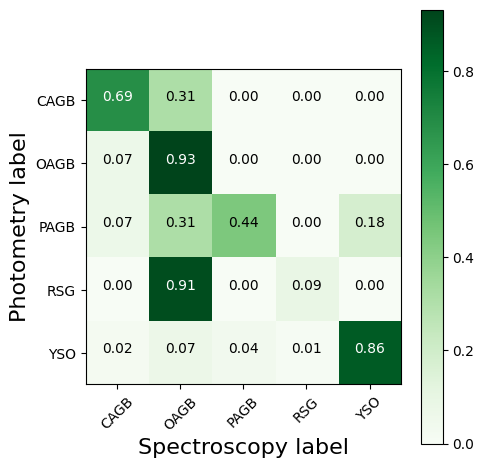

Model_name: PRF-01-10-89-0
              precision    recall  f1-score   support

           0       0.26      0.77      0.39      8537
           1       0.70      0.42      0.52     37950
           2       0.00      0.44      0.01        45
           3       0.94      0.07      0.14      6132
           4       0.92      0.86      0.89      1642

    accuracy                           0.45     54306
   macro avg       0.57      0.51      0.39     54306
weighted avg       0.66      0.45      0.47     54306



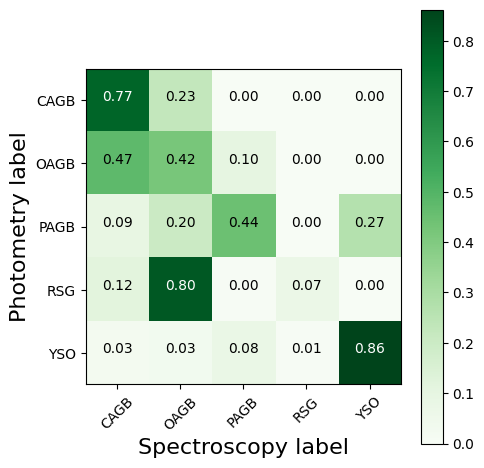

Model_name: PRF-S-05-10-89-0
              precision    recall  f1-score   support

           0       0.48      0.74      0.58      8537
           1       0.81      0.83      0.82     37950
           2       0.12      0.38      0.19        45
           3       0.93      0.10      0.17      6132
           4       0.99      0.85      0.91      1642

    accuracy                           0.73     54306
   macro avg       0.67      0.58      0.54     54306
weighted avg       0.78      0.73      0.71     54306



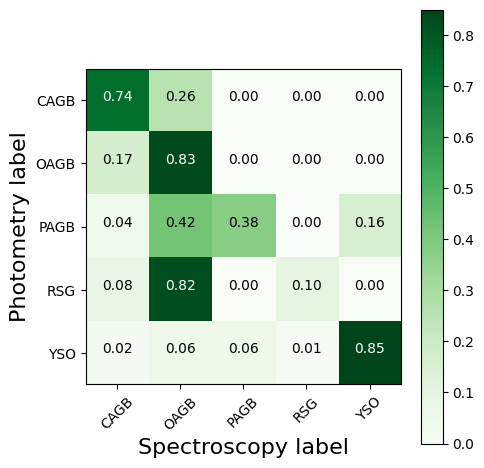

Model_name: PRF-08-10-89-1
              precision    recall  f1-score   support

           0       0.93      0.71      0.81      8537
           1       0.82      0.99      0.90     37950
           2       0.10      0.31      0.15        45
           3       0.90      0.08      0.14      6132
           4       0.98      0.89      0.93      1642

    accuracy                           0.84     54306
   macro avg       0.75      0.60      0.59     54306
weighted avg       0.85      0.84      0.80     54306



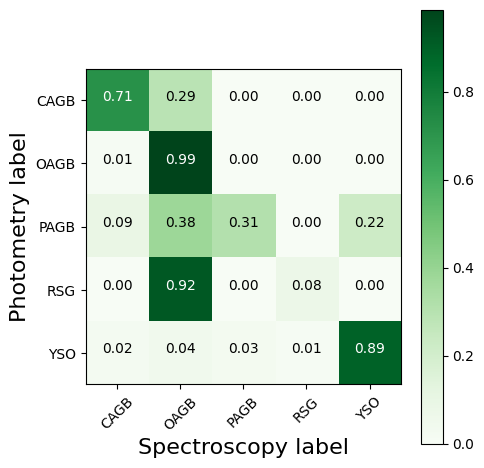

In [ ]:
results = []
for i in Models:
  model_name = i
  filename = Address_directory + model_name + '.sav'
  loaded_model = pickle.load(open(filename, 'rb'))
  Y_pred_save_model = loaded_model.predict(X_TEST)
  results.append(list(Y_pred_save_model))
  Model_name = i#.split('-')[0]
  #keep_proba = i.split('-')[1].split('0')[1]
  #n_stimator = i.split('-')[2]
  print('======================================================')
  print('Model_name: ' + Model_name)
  #print('Parameters: ')
  #print('   keep_proba = 0.' + keep_proba)
  #print('   n_stimator = ' + n_stimator)
  print('======================================================')
  print(classification_report( Y_TEST , Y_pred_save_model ))
  cm = confusion_matrix(Y_TEST , Y_pred_save_model )
  plot_confusion_matrix(cm = cm ,
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = None,
                      file_name = model_name +'_CM_Test.jpg',
                      size = (5,5),
                      color_bar=True)

In [ ]:
result_df = pd.DataFrame(list(zip(results[0],results[1],results[2],
                                  results[3])), columns =Models)

result_df = result_df[result_df[Models[0]] == result_df[Models[1]]]
result_df = result_df[result_df[Models[0]] == result_df[Models[2]]]
result_df = result_df[result_df[Models[0]] == result_df[Models[3]]]
result_df['SpType_us'] = result_df[Models[0]]
result_df = result_df.drop(Models,axis=1)

In [ ]:
result_df

,SpType_us
0,4
3,1
4,2
5,2
6,1
...,...
54300,0
54302,0
54303,1
54304,1


In [ ]:
Y_test_fd = pd.DataFrame(Y_TEST)
Y_test_fd = Y_test_fd.iloc[list(result_df.index),:]

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      5527
           1       0.70      1.00      0.82     12011
           2       0.34      0.48      0.40        27
           3       0.96      0.08      0.16      4636
           4       0.99      0.95      0.97      1400

    accuracy                           0.78     23601
   macro avg       0.79      0.67      0.65     23601
weighted avg       0.83      0.78      0.72     23601



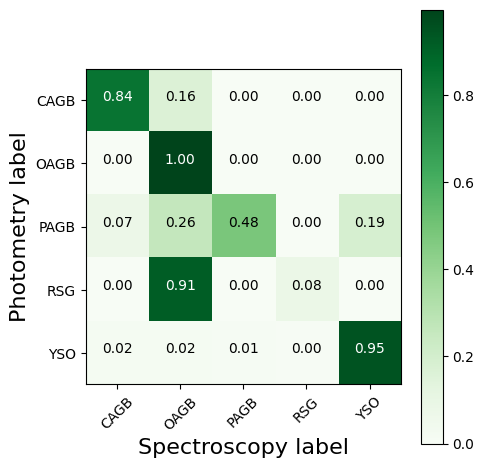

In [ ]:
Y_pred_save_model = np.array(result_df['SpType_us'])
Y_TEST = np.array(Y_test_fd['EY'])
print(classification_report( Y_TEST , Y_pred_save_model))
cm = confusion_matrix(Y_TEST , Y_pred_save_model )
plot_confusion_matrix(cm = cm ,
                    normalize    = True,
                    target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                    title  = None,
                    file_name = 'Common_CM_Test.jpg',
                    size = (5,5),
                    color_bar=True)

(array([ 4689.,     0., 17124.,     0.,     0.,    38.,     0.,   409.,
            0.,  1341.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

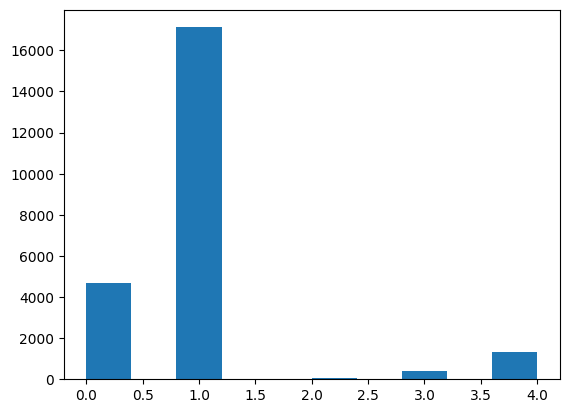

In [ ]:
plt.hist(Y_pred_save_model)
#plt.yscale('log')

In [ ]:
df_dif = pd.concat([Y_test_fd,result_df],axis=1)
df_dif = df_dif[df_dif['EY'] != df_dif['SpType_us']]

In [ ]:
df_dif = pd.concat([df_test.iloc[list(df_dif.index),:],df_dif],axis=1)
df_dif = df_dif.reset_index()

In [ ]:
df_dif

,index,RAJ2000,DEJ2000,Umag,Bmag,Vmag,Imag,Jmag,Hmag,Ksmag,[3.6],[4.5],[5.8],[8.0],[24],Ref,Type,EY,SpType_us
0,0,72.833083,-67.101333,0.64,-0.241,-1.658,-2.935,-3.942,-4.603,-4.777,-4.870,-4.784,-4.894,-4.916,-9.685,Kamath2015,PAGB,2,4
1,3,75.588208,-69.221444,-2.60,-3.408,-4.380,-5.424,-5.565,-5.886,-5.936,-6.031,-6.097,-6.184,-6.079,-10.731,Kamath2015,PAGB,2,1
2,6,78.463833,-70.782333,NaN,0.863,-1.260,-3.548,-4.851,-5.825,-6.062,-6.281,-6.200,-6.382,-7.138,-8.957,Kamath2015,PAGB,2,1
3,13,80.577167,-69.837028,NaN,0.100,-1.750,-3.959,-5.627,-6.669,-7.022,-8.022,-8.854,-9.750,-10.832,-13.157,Kamath2015,PAGB,2,0
4,18,81.488833,-68.080694,NaN,-1.348,-2.642,-3.642,-5.367,-6.161,-6.298,-6.517,-6.367,-6.462,-6.566,-9.015,Kamath2015,PAGB,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5273,54297,27.319312,-73.732432,NaN,NaN,NaN,NaN,-5.936,-6.847,-7.261,-7.710,-7.580,-7.960,-8.310,NaN,Boyer2011,CAGB,0,1
5274,54299,27.393923,-73.811316,NaN,NaN,NaN,NaN,-5.226,-6.107,-6.571,-7.070,-7.090,-7.400,-7.610,NaN,Boyer2011,CAGB,0,1
5275,54303,29.054917,-73.477329,NaN,NaN,NaN,NaN,-5.696,-6.697,-7.281,-7.910,-7.800,-7.990,-8.400,NaN,Boyer2011,CAGB,0,1
5276,54304,32.181180,-75.020332,NaN,NaN,NaN,NaN,-6.266,-7.197,-7.681,-8.180,-8.030,-8.180,-8.520,NaN,Boyer2011,CAGB,0,1


(array([  14.,    0.,  899.,    0.,    0.,   74.,    0.,   46.,    0.,
        4245.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

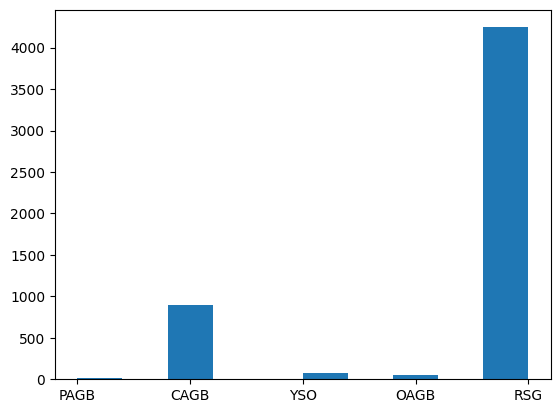

In [ ]:
plt.hist(df_dif['Type'])

(array([  43.,   10.,  575.,   27.,   30.,   95., 1518.,   32.,  125.,
        2823.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

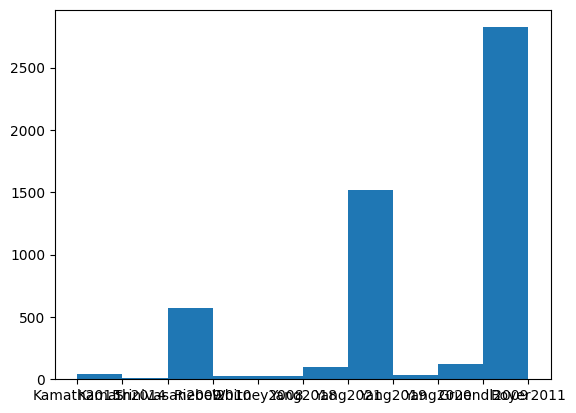

In [ ]:
plt.hist(df_dif['Ref'])

In [ ]:
list_row_nan = []
list_Class = []
list_row_nan_6 = []
list_Class_6 = []
list_index_6 = []
for i in range(0,len(df_dif)):
  count_nan = df_dif.iloc[i].isnull().sum()
  list_row_nan.append(count_nan)
  list_row_nan_6.append(count_nan)
  list_Class_6.append(df_dif.iloc[i][-2])
  list_index_6.append(i)

In [ ]:
df_dif['Num_Nan'] = np.array(list_row_nan_6)

(array([ 105., 1992.,    0.,  370.,    0.,   73.,  235.,    0.,  861.,
        1642.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

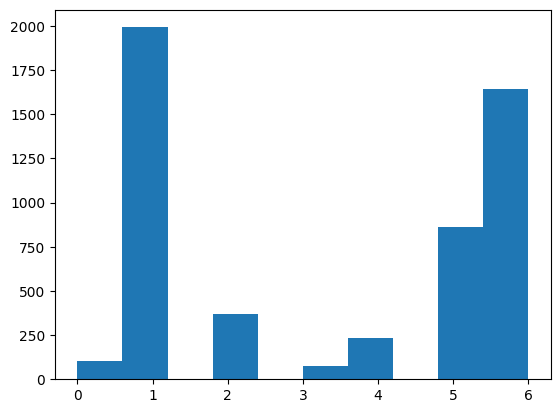

In [ ]:
plt.hist(df_dif['Num_Nan'] )

In [ ]:
import plotly.express as px

fig = px.histogram(df_dif, x="Num_Nan", color="Type")
fig.show()

In [ ]:
df_n = pd.concat([Y_test_fd,result_df],axis=1)
df_n = df_n[df_n['EY'] != 2 ]
df_n = df_n[df_n['EY'] != 3 ]
df_n = df_n[df_n['SpType_us'] != 2 ]
df_n = df_n[df_n['SpType_us'] != 3 ]

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      5523
           1       0.93      1.00      0.96     11997
           4       1.00      0.96      0.98      1376

    accuracy                           0.95     18896
   macro avg       0.97      0.93      0.95     18896
weighted avg       0.95      0.95      0.95     18896



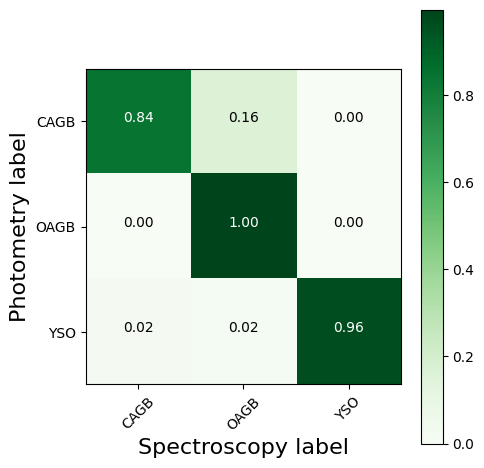

In [ ]:
Y_pred_save_model = np.array(df_n['SpType_us'])
Y_TEST = np.array(df_n['EY'])
print(classification_report( Y_TEST , Y_pred_save_model ))
cm = confusion_matrix(Y_TEST , Y_pred_save_model )
plot_confusion_matrix(cm = cm ,
                    normalize    = True,
                    target_names = ['CAGB', 'OAGB', 'YSO'] ,
                    title  = None,
                    file_name = 'Common_CM_Test_prime.jpg',
                    size = (5,5),
                    color_bar=True)

In [ ]:
pip install git+https://github.com/Mahdi-Abdollahii/AstroDC.git

  Cloning https://github.com/Mahdi-Abdollahii/AstroDC.git to /tmp/pip-req-build-crf28hmv
  Running command git clone --filter=blob:none --quiet https://github.com/Mahdi-Abdollahii/AstroDC.git /tmp/pip-req-build-crf28hmv
  Resolved https://github.com/Mahdi-Abdollahii/AstroDC.git to commit 6d94723b263b5b088791d07a5a66e931e24dde07
  Preparing metadata (setup.py) ... done
  Created wheel for AstroDC: filename=AstroDC-1.0.5-py3-none-any.whl size=2588 sha256=429c4eaae6c2454fdaed6643e48c20a27c290942d92cccd1491217f056b6d54f
  Stored in directory: /tmp/pip-ephem-wheel-cache-dbtgosya/wheels/82/b8/db/4179fef6fc03770dd498d786816b5f961dce1b9a70bd9499cd
Successfully built AstroDC


In [ ]:
from astropy import units
from AstroDC import AstroDC

In [ ]:
df_reg = pd.concat([Y_test_fd,result_df],axis=1)

In [ ]:
df_reg = pd.concat([df_test.iloc[list(df_reg.index),:],df_reg],axis=1)
df_reg = df_reg.reset_index()

In [ ]:
df_reg_smc = df_reg[df_reg['RAJ2000']<50]
df_reg_lmc = df_reg[df_reg['RAJ2000']>50]

In [ ]:
df_reg_lmc

,index,RAJ2000,DEJ2000,Umag,Bmag,Vmag,Imag,Jmag,Hmag,Ksmag,[3.6],[4.5],[5.8],[8.0],[24],Type,Ref,EY,SpType_us
0,0,72.833083,-67.101333,0.640,-0.241,-1.658,-2.935,-3.942,-4.603,-4.777,-4.870,-4.784,-4.894,-4.916,-9.685,PAGB,Kamath2015,2,4
1,3,75.588208,-69.221444,-2.600,-3.408,-4.380,-5.424,-5.565,-5.886,-5.936,-6.031,-6.097,-6.184,-6.079,-10.731,PAGB,Kamath2015,2,1
2,4,76.633750,-71.708278,-3.994,-4.025,-4.378,-4.803,-5.115,-5.250,-5.325,-5.481,-5.643,-7.029,-9.278,-13.352,PAGB,Kamath2015,2,2
3,5,77.685292,-69.209167,-2.975,-2.798,-3.084,-3.307,-3.791,-4.327,-5.160,-6.794,-7.428,-8.073,-9.075,-11.489,PAGB,Kamath2015,2,2
4,6,78.463833,-70.782333,NaN,0.863,-1.260,-3.548,-4.851,-5.825,-6.062,-6.281,-6.200,-6.382,-7.138,-8.957,PAGB,Kamath2015,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19260,48091,91.531460,-67.898720,NaN,NaN,NaN,NaN,-2.673,-3.364,-3.753,-4.610,-4.730,-4.970,-7.460,-9.860,YSO,Gruendl2009,4,4
19261,48092,91.593500,-67.977970,NaN,NaN,NaN,NaN,-3.543,-4.144,-4.583,-5.550,-5.540,-6.220,-8.500,-11.070,YSO,Gruendl2009,4,4
19262,48093,91.686920,-67.117280,NaN,NaN,NaN,NaN,-3.783,-4.454,-4.943,NaN,-5.660,-6.390,-8.230,-12.120,YSO,Gruendl2009,4,4
19263,48094,92.015960,-66.872860,NaN,NaN,NaN,NaN,-3.443,-4.164,-4.393,-5.660,-5.880,-7.540,-9.510,-13.390,YSO,Gruendl2009,4,4


In [ ]:
colors = ['red','green','blue','magenta','cyan']
SpClass = ['YSO','CAGB','OAGB','RSG','PAGB']
spClass_num = [4,0,1,3,2]
for i in range(len(colors)) :
  df_ = df_reg_lmc[df_reg_lmc['SpType_us'] == spClass_num[i]]
  color_ = colors[i]
  File_name_ = 'LMC'+'_'+  SpClass[i]
  AstroDC.Reg_file( df_ ,'RAJ2000','DEJ2000', Units = units.deg, Color = color_, Size = 100 , File_name = File_name_ )

LMC_YSO.reg file of this data saved in local directory.
LMC_CAGB.reg file of this data saved in local directory.
LMC_OAGB.reg file of this data saved in local directory.
LMC_RSG.reg file of this data saved in local directory.
LMC_PAGB.reg file of this data saved in local directory.


In [ ]:
colors = ['red','green','blue','magenta','cyan']
SpClass = ['YSO','CAGB','OAGB','RSG','PAGB']
spClass_num = [4,0,1,3,2]
for i in range(len(colors)) :
  df_ = df_reg_smc[df_reg_smc['SpType_us'] == spClass_num[i]]
  color_ = colors[i]
  File_name_ = 'SMC'+'_'+  SpClass[i]
  AstroDC.Reg_file( df_ ,'RAJ2000','DEJ2000', Units = units.deg, Color = color_, Size = 100 , File_name = File_name_ )

SMC_YSO.reg file of this data saved in local directory.
SMC_CAGB.reg file of this data saved in local directory.
SMC_OAGB.reg file of this data saved in local directory.
SMC_RSG.reg file of this data saved in local directory.
SMC_PAGB.reg file of this data saved in local directory.
